In [1]:
import numpy as np
import glob
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
import re
import scipy.stats

In [2]:
inputDirs = {'tv': '../../train/recon/tv_2d/', 
#              'nlm': '../../train/recon/nlm_fp/', 
             'csc': '../../train/recon/csc_2d/',
             'denoising': '../../train/recon/n2n_denoising_2d/denoising/'}
inputSlices = [2, 16, 26, 54, 55, 73, 75, 86, 93, 95]

In [3]:
gammaList = {}
rmseList = {}
for k in inputDirs:
    subDirs = glob.glob(os.path.join(inputDirs[k], '*'))
    
    gammas = []
    rmses = []
    
    for subDir in subDirs:
        try:
            gamma = float(os.path.basename(subDir).split('_')[0])
        except:
            continue

        gammas.append(gamma)
        for inputSlice in inputSlices:
            rmse = np.load(os.path.join(subDir, str(inputSlice), 'loss.npz'))['val']
            if rmse.ndim == 0:
                rmse = float(rmse)
            else:
                rmse = rmse[-1,-1]
            rmses.append(rmse)
    
    gammas = np.array(gammas)
    rmses = np.reshape(np.array(rmses), (len(gammas),-1))

    gammaList[k] = gammas
    rmseList[k] = np.mean(rmses,-1)

In [4]:
rmseList

{'tv': array([0.02128163, 0.02989899, 0.02240745, 0.0213141 , 0.02158716,
        0.02203988]),
 'csc': array([0.01790902, 0.03619705, 0.0221792 , 0.02069406, 0.02412034]),
 'denoising': array([0.02337659, 0.02135809, 0.02085251, 0.02143926, 0.02200868])}

In [5]:
gammaList

{'tv': array([4.e-05, 1.e-05, 2.e-05, 3.e-05, 5.e-05, 6.e-05]),
 'csc': array([0.02 , 0.005, 0.01 , 0.04 , 0.06 ]),
 'denoising': array([0., 1., 2., 3., 4.])}

In [28]:
# nlm: 2-dimensional search
inputDirs = {'nlm': '../../train/recon/nlm_2d/'}

In [30]:
paramList = {}
rmseList = {}
for k in inputDirs:
    subDirs = glob.glob(os.path.join(inputDirs[k], '*'))
    
    params = []
    rmses = []
    
    for subDir in subDirs:
        try:
            token = os.path.basename(subDir).split('_')
            gamma = float(token[0])
            sigma = float(token[2])
        except:
            continue
            
        params.append([gamma, sigma])
        for inputSlice in inputSlices:
            rmse = np.load(os.path.join(subDir, str(inputSlice), 'loss.npz'))['val']
            if rmse.ndim == 0:
                rmse = float(rmse)
            else:
                rmse = rmse[-1,-1]
            rmses.append(rmse)
    
    params = np.array(params)
    rmses = np.reshape(np.array(rmses), (params.shape[0],-1))

    paramList[k] = params
    rmseList[k] = np.mean(rmses,-1)

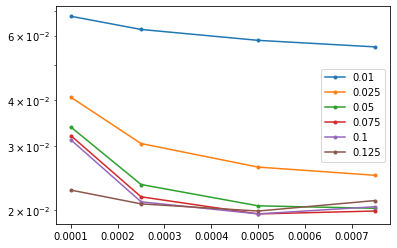

In [31]:
plt.figure()
sigmas = np.unique(paramList['nlm'][:, 1])
for sigma in sigmas:
    inds = np.where(paramList['nlm'][:, 1] == sigma)[0]
    gammas = params[inds, 0]
    inds2 = np.argsort(gammas)
    gammas = gammas[inds2]
    rmses = rmseList['nlm'][inds][inds2]
    
    plt.semilogy(gammas, rmses, '.-')

plt.legend(sigmas)

In [10]:
rmseList

{'nlm': array([0.02027536, 0.06234527, 0.05588296, 0.05822541, 0.06774364,
        0.04073424, 0.03044863, 0.02494478, 0.02626391, 0.02059073,
        0.02354228, 0.03378468, 0.01993124, 0.02179096, 0.0320026 ,
        0.01957152, 0.02048057, 0.02111614, 0.03117956, 0.01957368])}

In [11]:
paramList

{'nlm': array([[0.00075, 0.05   ],
        [0.00025, 0.01   ],
        [0.00075, 0.01   ],
        [0.0005 , 0.01   ],
        [0.0001 , 0.01   ],
        [0.0001 , 0.025  ],
        [0.00025, 0.025  ],
        [0.00075, 0.025  ],
        [0.0005 , 0.025  ],
        [0.0005 , 0.05   ],
        [0.00025, 0.05   ],
        [0.0001 , 0.05   ],
        [0.00075, 0.075  ],
        [0.00025, 0.075  ],
        [0.0001 , 0.075  ],
        [0.0005 , 0.075  ],
        [0.00075, 0.1    ],
        [0.00025, 0.1    ],
        [0.0001 , 0.1    ],
        [0.0005 , 0.1    ]])}